# Working with a hand radiograph. 

Hand radiograph are obtained from [2017 Radiological Society of North America competition](http://rsnachallenges.cloudapp.net/competitions/4). 

X-ray intensities are high in dense tissue such as bone. Such images can be used to predict "bone age " in children.

### Loading images

In [10]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi  # 
import matplotlib.style as style
style.use('fivethirtyeight')


im = imageio.imread('Data/hand.png')

print('Data type:', im.dtype)
print('Min. value:', im.min())
print('Max value:', im.max())

Data type: uint8
Min. value: 3
Max value: 224


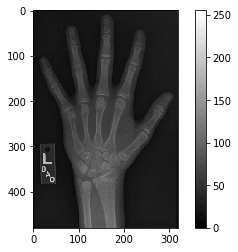

In [2]:
# normalize luminance data using vmin and vmax. 

plt.imshow(im, vmin=0, vmax=255, cmap='gray')
plt.colorbar()

### Visualizing distribution of values

The distribution of values can be visualized using a histogram. The frequency with which a given range of pixel intensies occur is derived using the CDF (cumulative distribution function)

The 'intensity distribution' is thus discribed using the histogram and CDF


The CDF is simply calculated by,

- First: finding the cumulative sum of `hist()`,
- then dividing by the total number of pixels in `hist()`.

Text(0.5,1,'CDF')

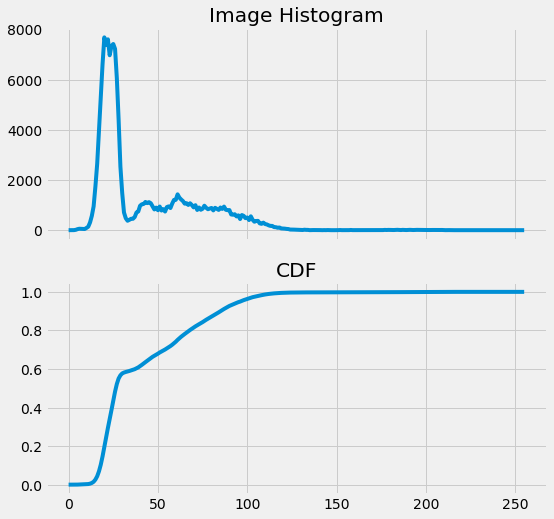

In [14]:
# Create a histogram, binned at each possible value

# Generates a 256-bin histogram of image which covers the full range of np.uint8 values.
hist = ndi.histogram(im, min=0, max=255, bins=256)

# Create a cumulative distribution function
cdf = hist.cumsum() / hist.sum()

# Plot the histogram and CDF
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,8))
ax[0].plot(hist, label='Histogram')
ax[0].set_title('Image Histogram')
ax[1].plot(cdf, label='CDF')
ax[1].set_title('CDF')

## Image Masks


We can restrict the analysis to only the most important part of an image by creating and applying something called as "Image Masks"